In [ ]:
 import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import statistics as st

In [ ]:
pip install pandas numpy scipy

In [ ]:
df = pd.read_csv('/content/PCOD_datset.csv')

In [ ]:
df.shape

(374, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Timestamp                 374 non-null    object
 1   Periods                   374 non-null    object
 2   Period Length(day)        374 non-null    int64 
 3   Facial Hair Growth        374 non-null    object
 4   Hairloss                  374 non-null    object
 5   Avg Cycle Length          374 non-null    int64 
 6   Heavy Bleeding            374 non-null    object
 7   Abnormal Cholesterol      374 non-null    object
 8   Blood Pressure            374 non-null    object
 9   Sugar Levels              374 non-null    object
 10  PCOD History              374 non-null    object
 11  Pain                      374 non-null    object
 12  Height (cm)               374 non-null    int64 
 13  Weight (kgs)              374 non-null    int64 
 14  Other Medical Conditions  

In [ ]:
df.describe()

,Period Length(day),Avg Cycle Length,Height (cm),Weight (kgs),Age,Sleep hrs
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,5.104278,28.149733,159.791444,56.596257,20.430481,6.620321
std,1.644662,5.072032,25.719133,11.919079,4.285299,1.264154
min,2.000000,6.000000,104.000000,30.000000,10.000000,3.000000
25%,4.000000,25.000000,154.000000,48.000000,18.000000,6.000000
50%,5.000000,28.000000,159.000000,55.000000,20.000000,7.000000
75%,6.000000,31.000000,164.000000,63.000000,21.000000,7.000000
max,11.000000,39.000000,625.000000,103.000000,35.000000,10.000000


In [ ]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# 1. Z-Test for Mean between two groups based on 'Facial Hair Growth'
def test_mean(column_name, group_column):
    group1 = df[df[group_column] == 'Yes'][column_name].dropna().astype(float)
    group2 = df[df[group_column] == 'No'][column_name].dropna().astype(float)

    z_stat, p_value = ztest(group1, group2)

    if p_value < 0.05:
        return f"p value is {p_value}\nDependent (reject H0)"
    else:
        return f"p value is {p_value}\nIndependent (Accepted H0)"

# 2. Z-Test for Proportions between two groups based on 'Facial Hair Growth'
def test_proportion(column_name, group_column):
    group1_count = df[(df[group_column] == 'Yes') & (df[column_name] == 'Yes')].shape[0]
    group1_total = df[df[group_column] == 'Yes'].shape[0]
    group2_count = df[(df[group_column] == 'No') & (df[column_name] == 'Yes')].shape[0]
    group2_total = df[df[group_column] == 'No'].shape[0]

    count = np.array([group1_count, group2_count])
    nobs = np.array([group1_total, group2_total])

    z_stat, p_value = proportions_ztest(count, nobs)

    if p_value < 0.05:
        return f"p value is {p_value}\nDependent (reject H0)"
    else:
        return f"p value is {p_value}\nIndependent (Accepted H0)"

# List of columns for mean tests
mean_columns = ['Period Length(day)', 'Height (cm)', 'Weight (kgs)', 'Avg Cycle Length', 'Age']

# List of columns for proportion tests
proportion_columns = ['Hairloss', 'Heavy Bleeding', 'Exercise']

# Choose another categorical column as the group basis (e.g., Facial Hair Growth)
group_column = 'Facial Hair Growth'

# Testing means
print("Mean Tests:")
for col in mean_columns:
    result = test_mean(col, group_column)
    print(f"\nTesting between {group_column} and {col}:")
    print(result)

# Testing proportions
print("\nProportion Tests:")
for col in proportion_columns:
    result = test_proportion(col, group_column)
    print(f"\nTesting between {group_column} and {col}:")
    print(result)


Mean Tests:

Testing between Facial Hair Growth and Period Length(day):
p value is 0.0005302410575768314
Dependent (reject H0)

Testing between Facial Hair Growth and Height (cm):
p value is 0.15523049958590987
Independent (Accepted H0)

Testing between Facial Hair Growth and Weight (kgs):
p value is 0.03776778276657222
Dependent (reject H0)

Testing between Facial Hair Growth and Avg Cycle Length:
p value is 0.012608766040759774
Dependent (reject H0)

Testing between Facial Hair Growth and Age:
p value is 0.49715722624406544
Independent (Accepted H0)

Proportion Tests:

Testing between Facial Hair Growth and Hairloss:
p value is 0.0003413435039814834
Dependent (reject H0)

Testing between Facial Hair Growth and Heavy Bleeding:
p value is 4.85422259576877e-05
Dependent (reject H0)

Testing between Facial Hair Growth and Exercise:
p value is nan
Independent (Accepted H0)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


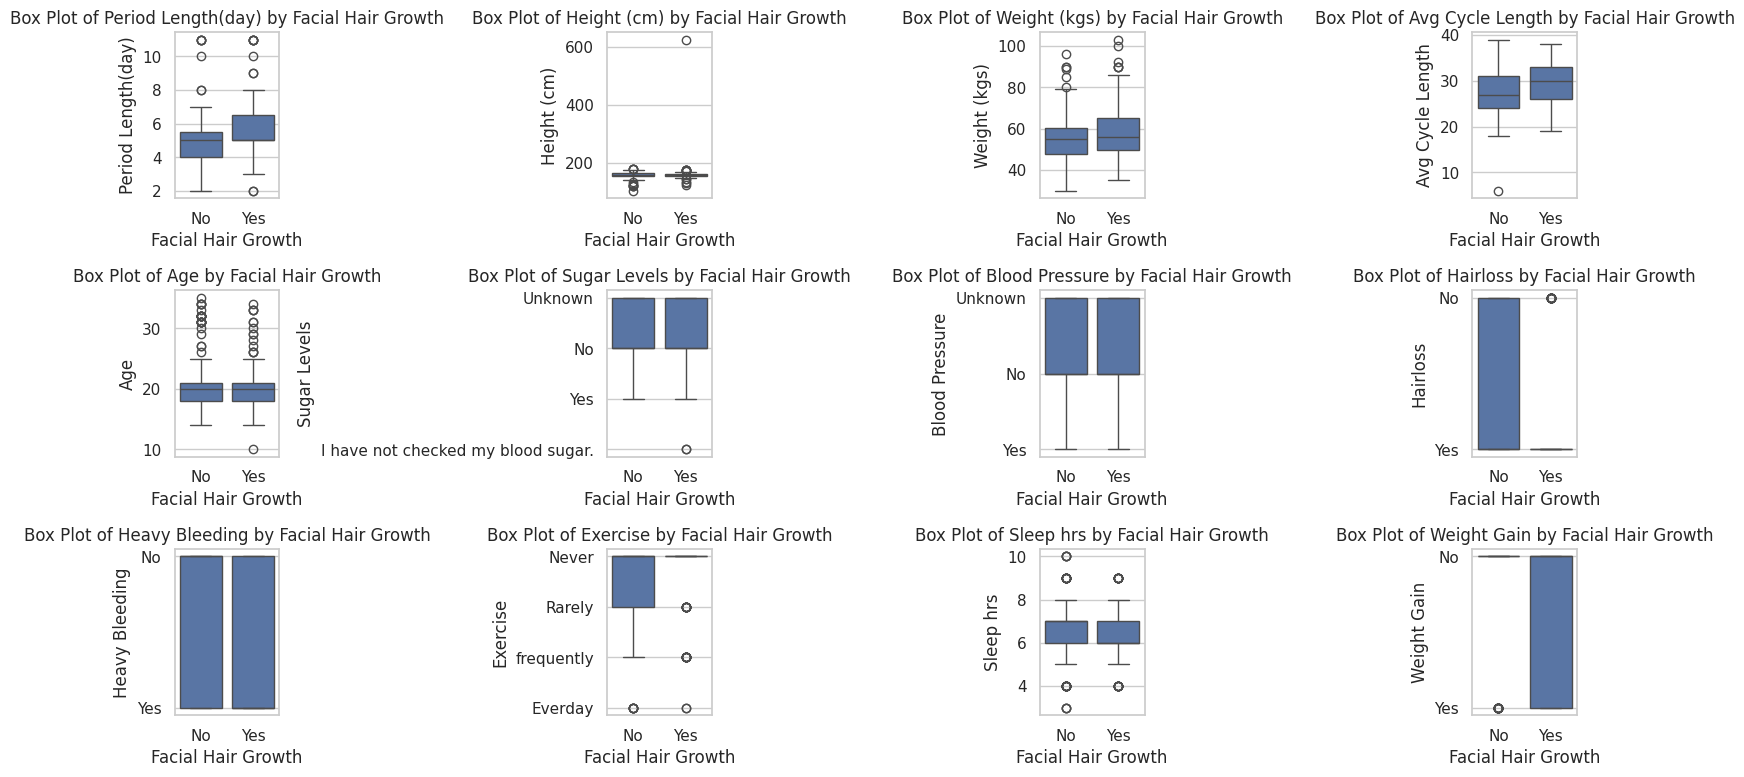

In [ ]:
# Create box plots for each numerical column using Facial Hair Growth as the x-axis


# Set the aesthetics for the plots
sns.set(style="whitegrid")

# List of numerical columns to plot
columns = ['Period Length(day)', 'Height (cm)', 'Weight (kgs)',
                     'Avg Cycle Length', 'Age', 'Sugar Levels',
                     'Blood Pressure', 'Hairloss', 'Heavy Bleeding',
                     'Exercise', 'Sleep hrs', 'Weight Gain']


plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size as necessary
    sns.boxplot(x='Facial Hair Growth', y=column, data=df)
    plt.title(f'Box Plot of {column} by Facial Hair Growth')
    plt.xlabel('Facial Hair Growth')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


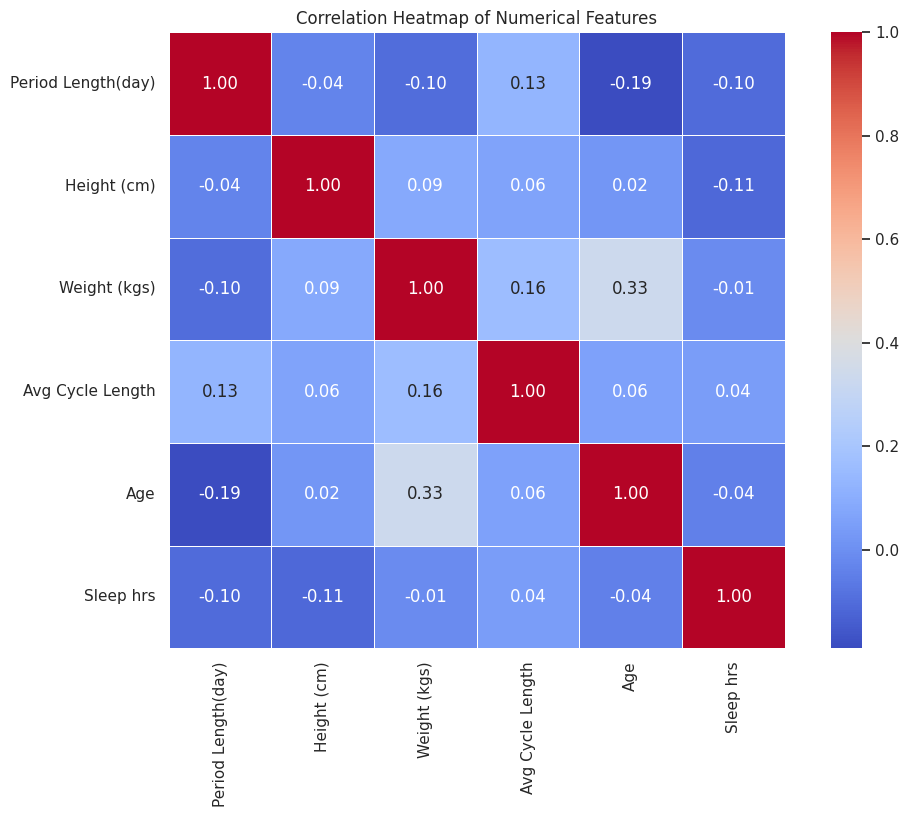

In [ ]:
# Heat Map for numnerical features
numerical_columns = ['Period Length(day)', 'Height (cm)', 'Weight (kgs)',
                     'Avg Cycle Length', 'Age',
                     'Sleep hrs']

# Convert non-numeric entries to NaN for numerical columns
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the correlation matrix, ignoring NaN values
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Features')

# Show the heatmap
plt.show()

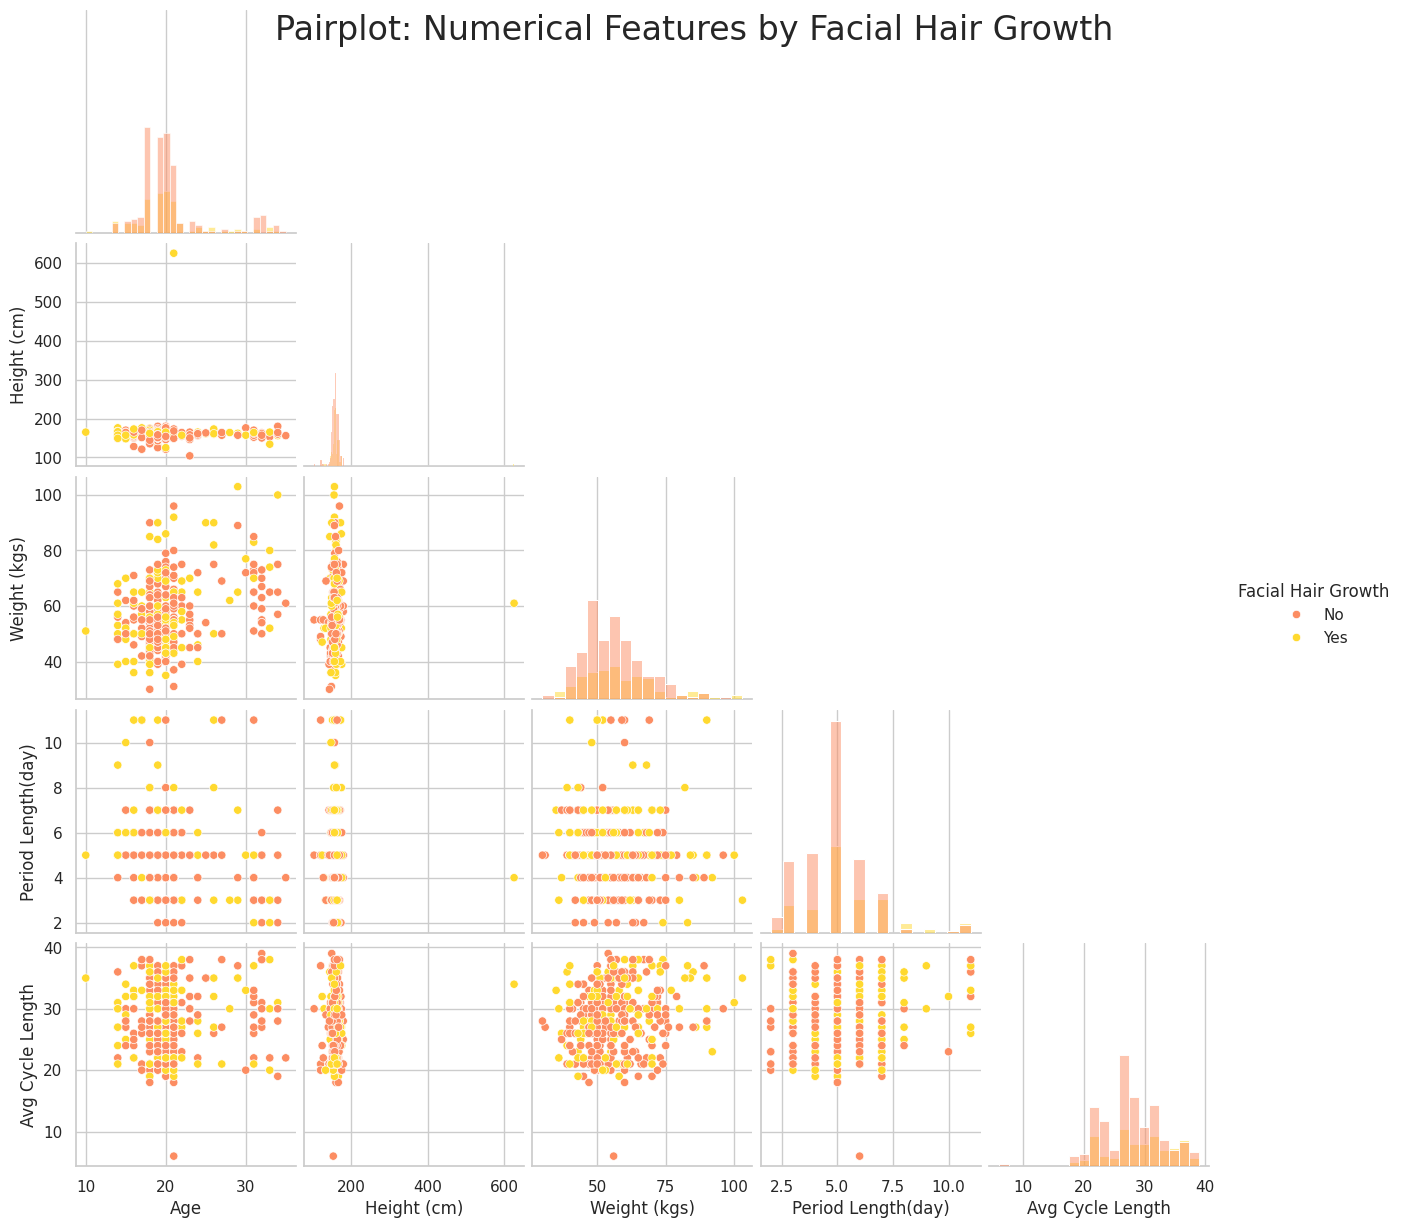

In [ ]:
numerical_features = ['Age', 'Height (cm)', 'Weight (kgs)', 'Period Length(day)', 'Avg Cycle Length']  # Add other numerical columns if necessary
target_column = 'Facial Hair Growth'  # Use 'Facial Hair Growth' as the target column

# Create a new DataFrame for the pairplot
data_pairplot = df[numerical_features + [target_column]]

# Define color palette
mypal = sns.color_palette("Set2")  # Change the color palette if needed

# Create the pairplot
g = sns.pairplot(data_pairplot, hue=target_column, corner=True, diag_kind='hist', palette=mypal[1::4])
plt.suptitle('Pairplot: Numerical Features by Facial Hair Growth', fontsize=24)
plt.show()

Summary of Categorical Features in the PCOS Dataset
Facial Hair Growth:

A significant proportion of patients (over 60%) report experiencing facial hair growth.
Individuals who experience facial hair growth are more likely to have PCOS, indicating a strong correlation between this symptom and the condition.
Heavy Bleeding:

A majority of patients do not report heavy bleeding, but a notable subset does.
Patients who experience heavy bleeding are more likely to be diagnosed with PCOS, suggesting that this symptom is an important indicator of the condition.
Hairloss:

A considerable number of patients report experiencing hair loss, which is a common symptom associated with PCOS.
The presence of hair loss symptoms appears to increase the likelihood of a PCOS diagnosis.
PCOS History:

The dataset shows that a significant portion of patients have a family history of PCOS.
Individuals with a family history of PCOS are more likely to be diagnosed with the condition, emphasizing the hereditary nature of this disorder.
Junk Food Consumption:

Most patients report frequently consuming junk food, with about 70% falling into this category.
Higher junk food consumption is associated with an increased risk of developing PCOS, reflecting lifestyle factors that contribute to the condition.
Exercise:

A large number of patients report little to no exercise.
Patients who engage in regular exercise show a lower incidence of PCOS, suggesting that physical activity may play a protective role against developing the condition.
Sleep Hours:

Most patients report an average of 6-7 hours of sleep.
Those with less sleep (fewer than 6 hours) tend to have a higher likelihood of developing PCOS, indicating that sleep patterns may affect hormonal balance.
Other Medical Conditions:

A notable percentage of patients report having other medical conditions.
Patients with additional medical conditions are more likely to be diagnosed with PCOS, pointing towards potential comorbidities that may exacerbate the syndrome.
Conclusion
This summary highlights the correlations between various categorical features and the likelihood of having PCOS. The findings suggest that symptoms such as facial hair growth, heavy bleeding, and hair loss are important indicators of the condition, while lifestyle factors like junk food consumption and exercise frequency also play a significant role.

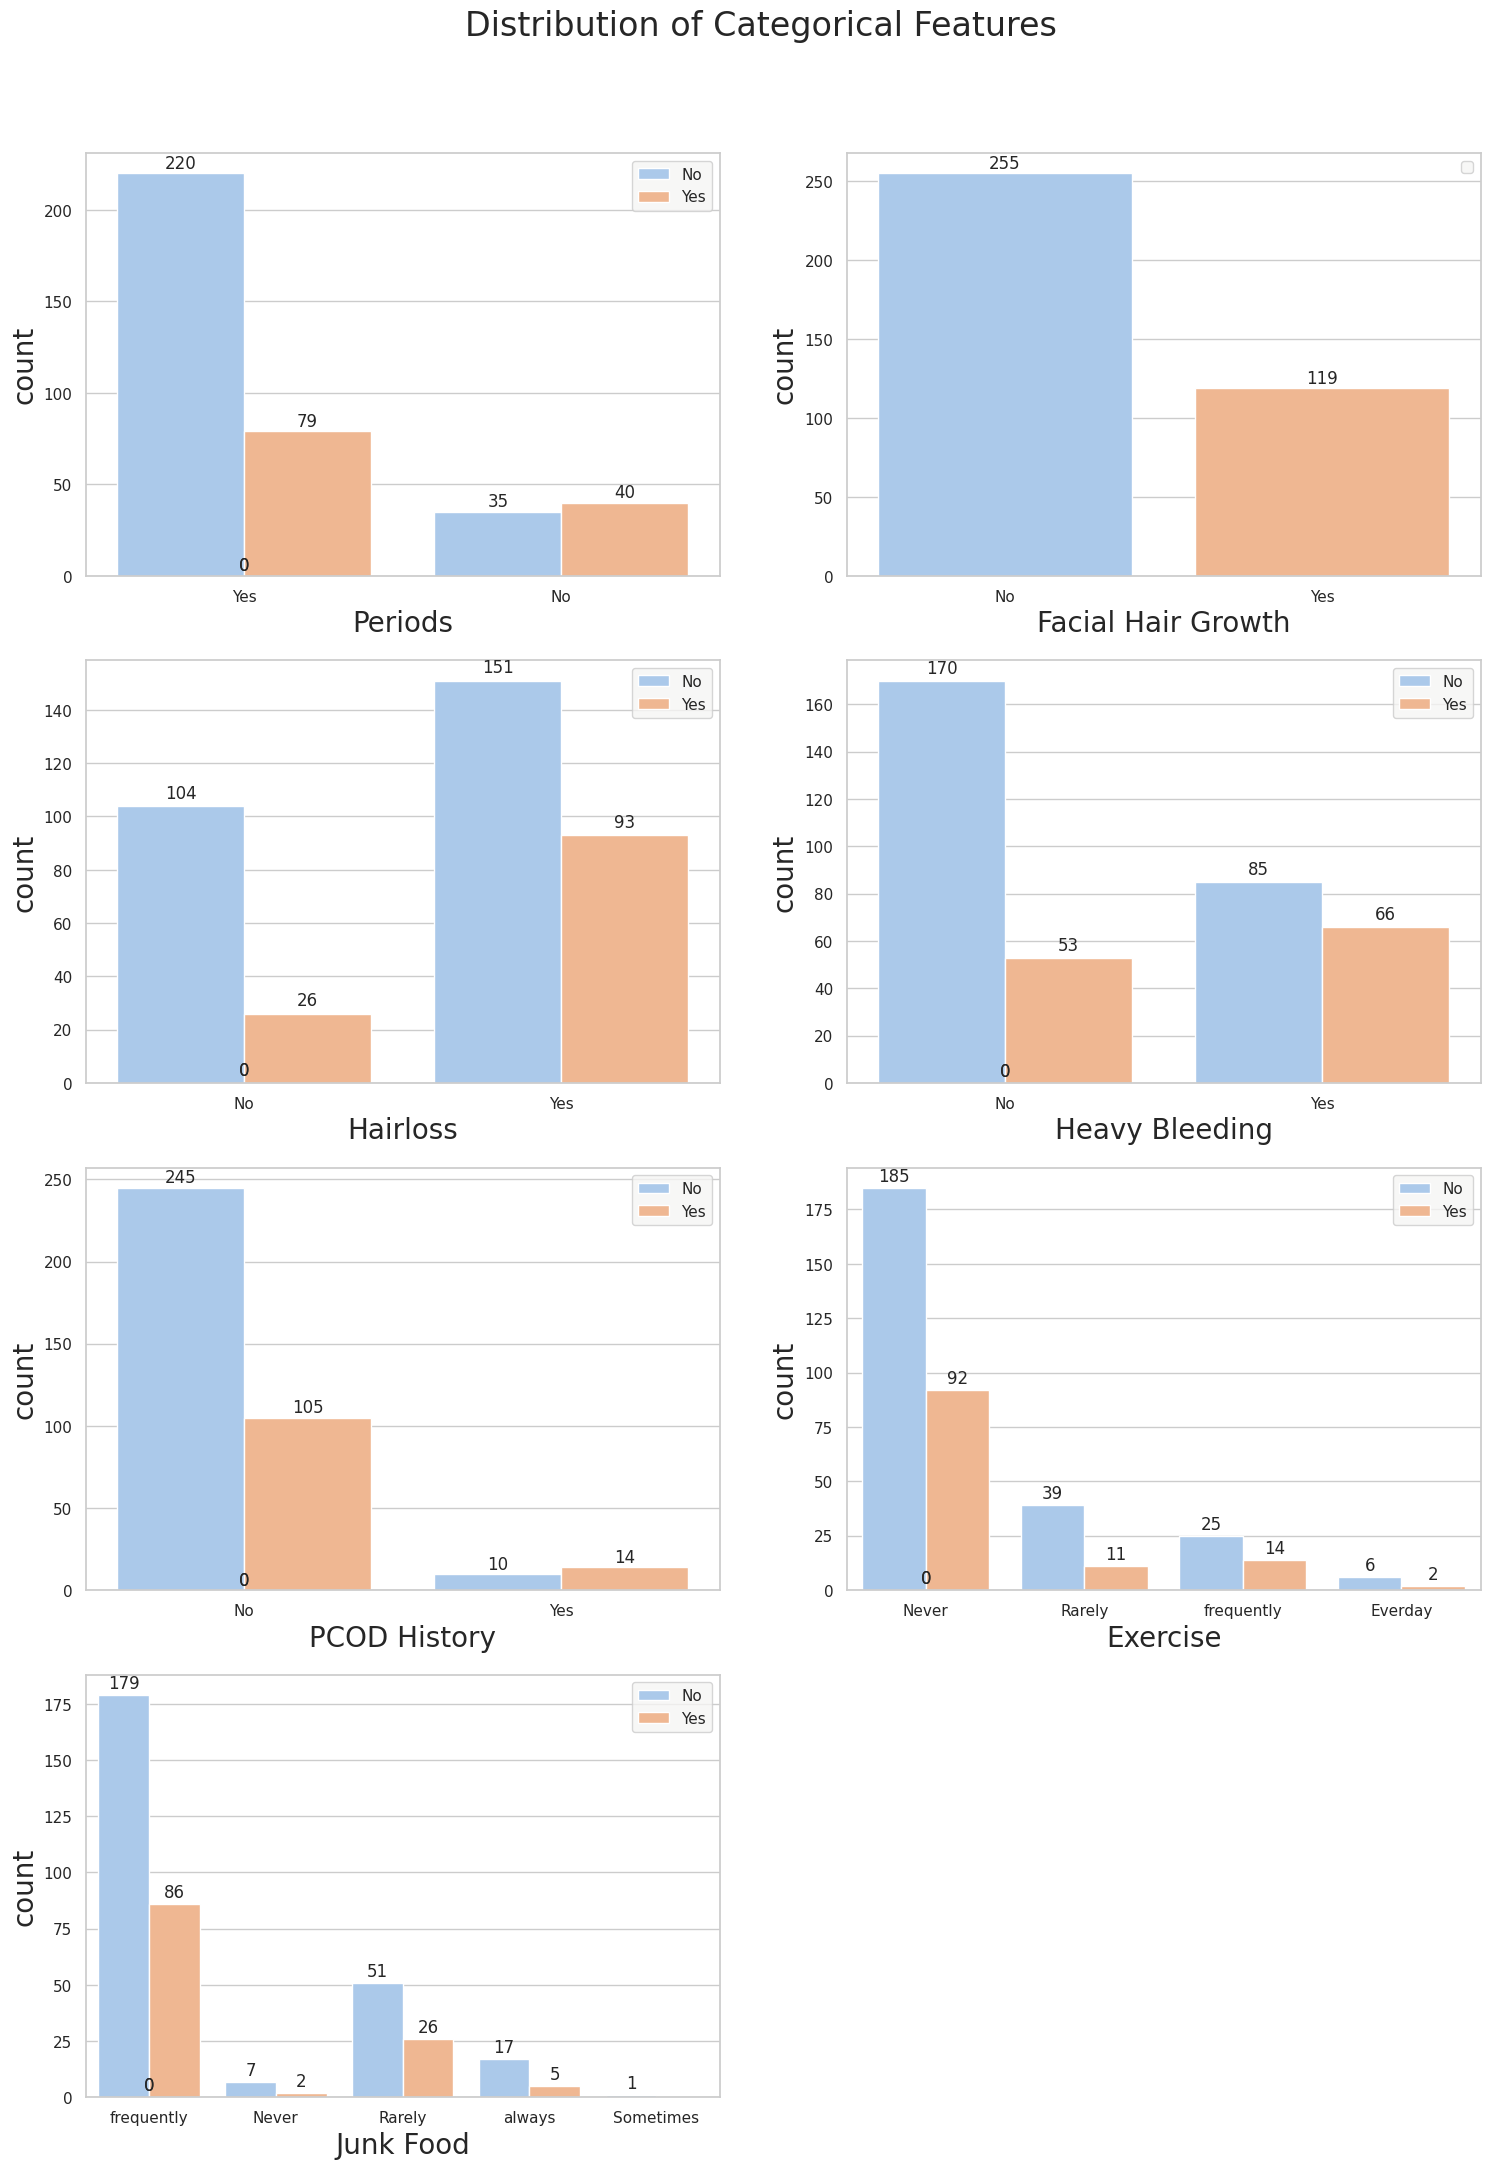

In [ ]:
# count plot for categorical features
cat_feats = ['Periods', 'Facial Hair Growth', 'Hairloss', 'Heavy Bleeding',
             'PCOD History', 'Exercise', 'Junk Food']

def count_plot(data, cat_feats, target_variable):
    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L/ncol))
    remove_last = (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol, figsize=(18, 24))
    fig.subplots_adjust(top=0.92)
    if remove_last > 0:
        ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i)
        sns.countplot(data=data, x=col, hue=target_variable, palette='pastel')
        ax = plt.gca()  # Get the current axis
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        # sns.despine(right=True)
        # sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center")

        i += 1

    plt.suptitle('Distribution of Categorical Features', fontsize=24)
    plt.show()

count_plot(df, cat_feats, target_variable='Facial Hair Growth')


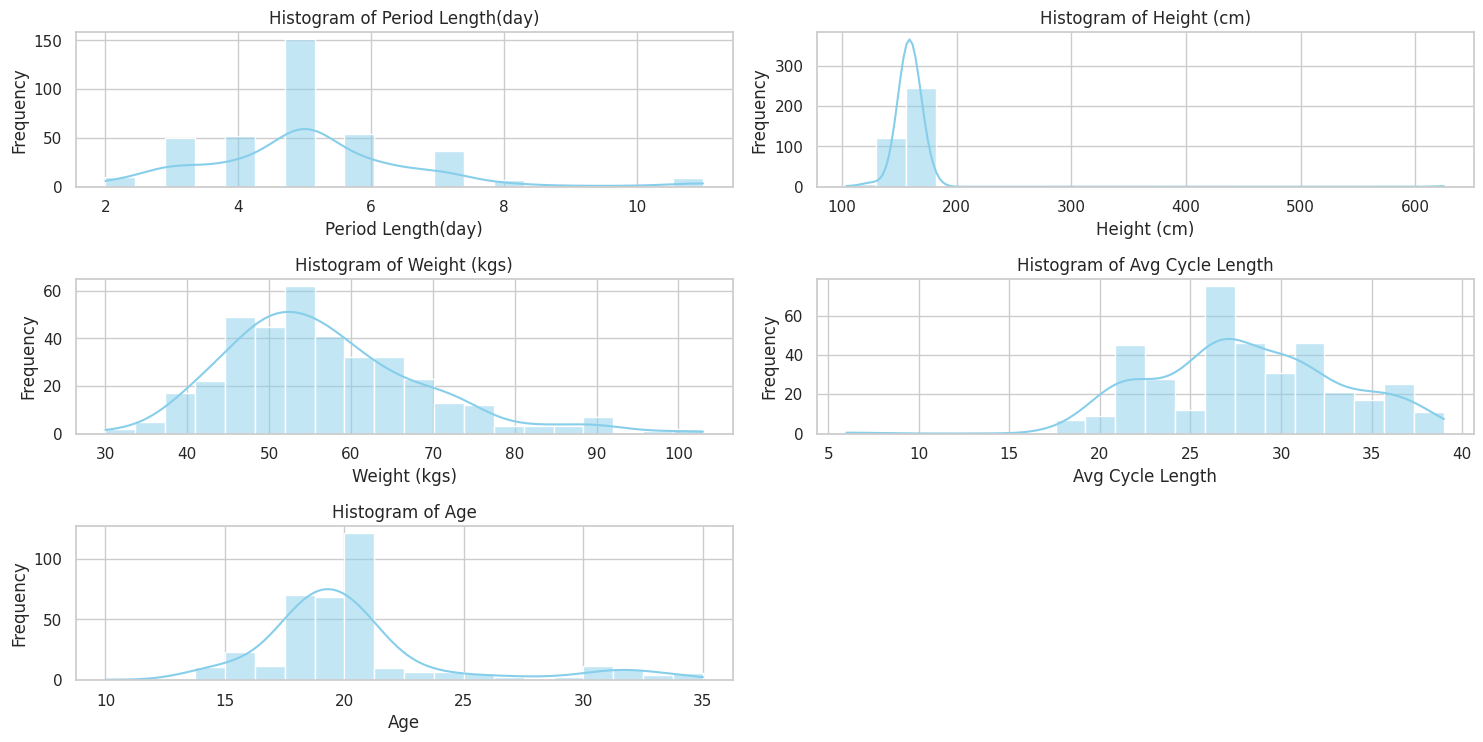

In [ ]:
numerical_columns = ['Period Length(day)', 'Height (cm)', 'Weight (kgs)', 'Avg Cycle Length', 'Age']

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 12))

# Generate histograms for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.histplot(df[column].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Pearson Correlation Matrix:
                    Period Length(day)  Height (cm)  Weight (kgs)  \
Period Length(day)            1.000000    -0.036245     -0.099462   
Height (cm)                  -0.036245     1.000000      0.087373   
Weight (kgs)                 -0.099462     0.087373      1.000000   
Avg Cycle Length              0.125715     0.063869      0.159012   
Age                          -0.190877     0.023099      0.334354   

                    Avg Cycle Length       Age  
Period Length(day)          0.125715 -0.190877  
Height (cm)                 0.063869  0.023099  
Weight (kgs)                0.159012  0.334354  
Avg Cycle Length            1.000000  0.058330  
Age                         0.058330  1.000000  

Spearman Correlation Matrix:
                    Period Length(day)  Height (cm)  Weight (kgs)  \
Period Length(day)            1.000000    -0.008521     -0.145500   
Height (cm)                  -0.008521     1.000000      0.257345   
Weight (kgs)              

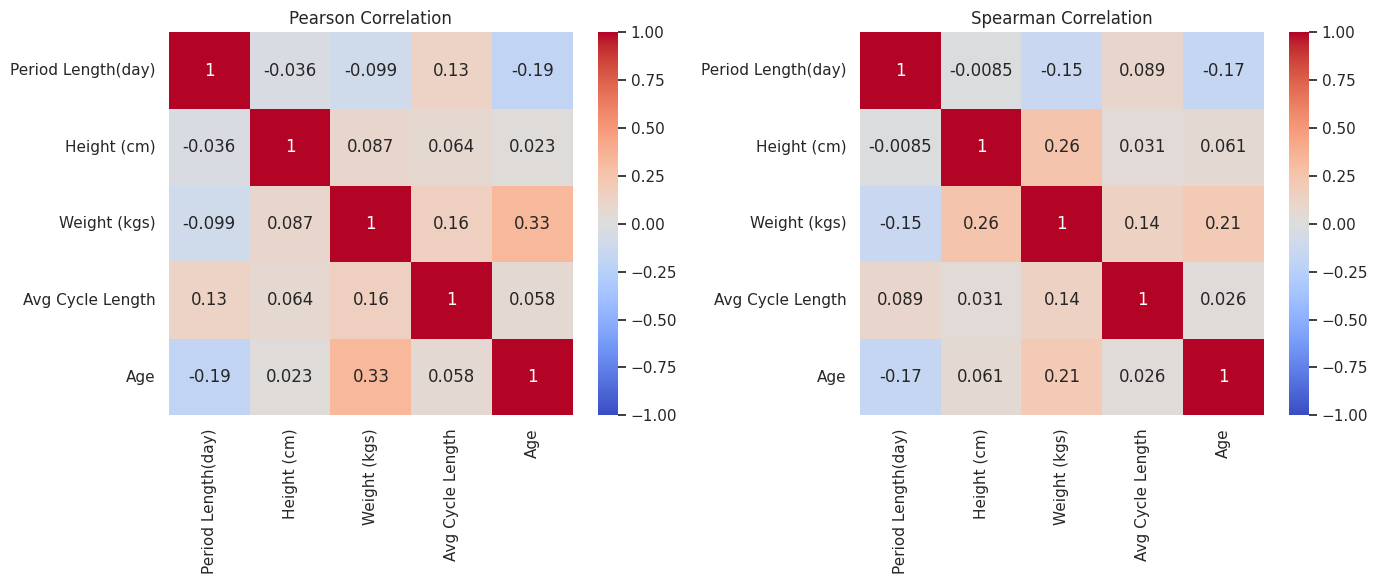

In [ ]:
# Compute Pearson correlation
pearson_corr = df[numerical_columns].corr(method='pearson')

# Compute Spearman correlation
spearman_corr = df[numerical_columns].corr(method='spearman')

# Display Pearson correlation
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Display Spearman correlation
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Plot Pearson and Spearman heatmaps side by side
plt.figure(figsize=(14, 6))

# Pearson heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

# Spearman heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()


In [ ]:
# mean mode median std deviation

# Create a dictionary to store the results
statistics = {}

for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]  # mode() returns a Series, so we select the first value
    variance = df[col].var()
    std_dev = df[col].std()

    # Store the results in the dictionary
    statistics[col] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Variance': variance,
        'Standard Deviation': std_dev
    }

# Convert the results to a DataFrame for better readability
statistics_df = pd.DataFrame(statistics).T

# Display the results
print(statistics_df)


                          Mean  Median   Mode    Variance  Standard Deviation
Period Length(day)    5.104278     5.0    5.0    2.704915            1.644662
Height (cm)         159.791444   159.0  160.0  661.473814           25.719133
Weight (kgs)         56.596257    55.0   50.0  142.064436           11.919079
Avg Cycle Length     28.149733    28.0   26.0   25.725509            5.072032
Age                  20.430481    20.0   20.0   18.363787            4.285299


STATISTICAL SUMMARY

Period Length (days):

Average: The average period length is 5.1 days.

Maximum: The longest period recorded is 11 days.

Minimum: The shortest period recorded is 2 days.

Avg Cycle Length:

Average: The average cycle length is 28.15 days.

Maximum: The longest cycle length is 39 days.

Minimum: The shortest cycle length is 6 days.

Note: The average cycle length for most women typically ranges between 21 to 35 days, so a cycle length shorter than 21 days or longer than 35 days may indicate menstrual irregularities.

Height (cm):

Average: The average height of the individuals is 159.79 cm.

Maximum: The tallest person recorded is 625 cm (likely an outlier or data entry error).

Minimum: The shortest height is 104 cm.

Note: A typical healthy adult height usually falls between 140 to 180 cm, suggesting that there may be errors in the dataset.

Weight (kgs):

Average: The average weight is 56.60 kgs.

Maximum: The heaviest person weighs 103 kgs.

Minimum: The lightest person weighs 30 kgs.

Note: Healthy weight ranges vary with height, but a body mass index (BMI) between 18.5 and 24.9 is generally considered healthy for most adults.

Age:

Average: The average age in the dataset is 20.43 years.

Maximum: The oldest individual is 35 years old.

Minimum: The youngest individual is 10 years old.

Note: This dataset seems to focus on younger individuals, perhaps adolescent to early adulthood. This could influence how the menstrual cycle data is interpreted.

Sleep (hrs):

Average: The average sleep duration is 6.62 hours per night.

Maximum: The longest recorded sleep duration is 10 hours.

Minimum: The shortest recorded sleep duration is 3 hours.

Note: According to sleep guidelines, adolescents should get around 8–10 hours of sleep, and adults typically require 7–9 hours. Therefore, many individuals in this dataset may not be meeting the recommended sleep duration.


Column: Period Length(day)
Q1: 4.0
Q3: 6.0
IQR: 2.0
First 5 Z-scores:
0    0.545353
1   -0.063489
2    1.154195
3    0.545353
4   -0.063489
Name: Period Length(day), dtype: float64

Column: Avg Cycle Length
Q1: 25.0
Q3: 31.0
IQR: 6.0
First 5 Z-scores:
0   -0.424408
1   -0.424408
2   -0.424408
3   -0.424408
4   -1.411527
Name: Avg Cycle Length, dtype: float64

Column: Weight (kgs)
Q1: 48.0
Q3: 63.0
IQR: 15.0
First 5 Z-scores:
0   -0.386138
1   -0.890207
2   -0.554161
3    0.117931
4    0.285954
Name: Weight (kgs), dtype: float64


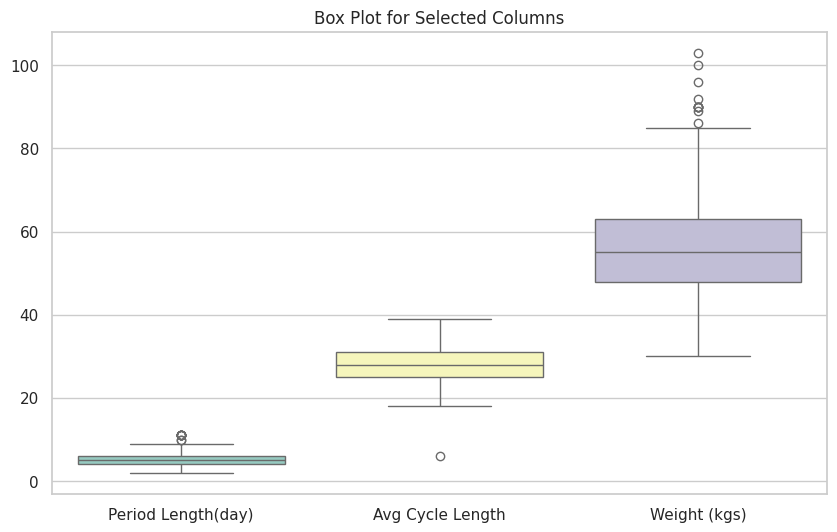

In [ ]:
#Find IQR and z-score for minimum three items in your dataset and verify using the box plot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset (replace with your actual dataset path)
df = pd.read_csv('/content/PCOD_datset.csv')

# Select three numerical columns for the analysis
selected_columns = ['Period Length(day)', 'Avg Cycle Length', 'Weight (kgs)']

# Function to calculate IQR and Z-score
def calculate_iqr_zscore(column):
    Q1 = df[column].quantile(0.25)  # 1st quartile
    Q3 = df[column].quantile(0.75)  # 3rd quartile
    IQR = Q3 - Q1
    z_scores = stats.zscore(df[column].dropna().astype(float))  # Calculate Z-score, excluding NaN values

    return Q1, Q3, IQR, z_scores

# Dictionary to store results
iqr_zscore_results = {}

# Compute IQR and Z-scores for selected columns
for col in selected_columns:
    Q1, Q3, IQR, z_scores = calculate_iqr_zscore(col)
    iqr_zscore_results[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Z-scores': z_scores
    }

# Display the IQR results
for col, stats in iqr_zscore_results.items():
    print(f"\nColumn: {col}")
    print(f"Q1: {stats['Q1']}")
    print(f"Q3: {stats['Q3']}")
    print(f"IQR: {stats['IQR']}")
    print(f"First 5 Z-scores:\n{stats['Z-scores'][:5]}")  # Print the first 5 Z-scores for illustration

# Verify with Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[selected_columns], palette="Set3")
plt.title('Box Plot for Selected Columns')
plt.show()
